# Do Diverse Cities Have Higher COVID-19 Mortality? 

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Benjamin Hinnant
- Desmond Vu
- Kayla Maldonado
- Alexander Gao
- Keshav Tiwari

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

What is the relationship between the racial backgrounds and urbanization levels of western and eastern states, and what is their effect on COVID-19 mortality rates in the USA?



## Background and Prior Work


During the COVID-19 pandemic, several analyses determined that people of color (POC) were experiencing a disproportionately larger COVID-19 mortality rate than Caucasians. One report from the APM Research Lab was written by Elisabeth Gawthrop, who used state-reported data from the U.S. Centers for Disease Control and Prevention, or CDC. She determined that as of September 27 of 2023, the COVID-19 mortality rate for Black individuals was around 55% higher than the rate for Caucasian individuals. The mortality rate for Latinos was nearly 65% higher than Caucasians.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1)

Another study done by Latoya Hill and Samantha Artiga used data from the CDC and the National Center for Health Statistics (NCHS). They determined that the largest differences in COVID-19 mortality rates between racial groups occurred during surges in the pandemic when the total mortality rate was particularly high. The first surge in COVID-19 deaths peaked in July 2020, and during this month, Hispanic individuals were five times more likely to die than Caucasians, American Indian or Alaska Natives (AIAN) were four times as likely to die, and Blacks were three times as likely to die. During the second surge in December 2020 and January 2021, all POC analyzed (Blacks, Hispanics, and AIAN) had higher rates of death than Caucasians.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)

These previous studies have already assessed the relationship between racial background and COVID-19 mortality rates.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1)<sup>,</sup><a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) As a result, we now want to determine the relationship between three variables: racial background, the level of urbanization, and whether the region of interest is an eastern or western state. We then want to determine the effect of these variables on COVID-19 mortality rates. By determining if any of these variables has a significant effect on mortality rates, we hope to potentially discover trends that can guide a future pandemic response.

References

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Gawthrop, Elisabeth. “Color of Coronavirus: COVID-19 deaths analyzed by race and ethnicity — APM Research Lab.” APM Research Lab, 19 October 2023, https://www.apmresearchlab.org/covid/deaths-by-race. Accessed 25 February 2024.

2. <a name="cite_note-2"></a> [^](#cite_ref-2) Hill, Latoya, and Samantha Artiga. “COVID-19 Cases and Deaths by Race/Ethnicity: Current Data and Changes Over Time.” KFF, 22 August 2022, https://www.kff.org/racial-equity-and-health-policy/issue-brief/covid-19-cases-and-deaths-by-race-ethnicity-current-data-and-changes-over-time/. Accessed 24 February 2024.


# Hypothesis


We predict that areas with a higher urbanization level will have higher COVID-19 mortality rates. Within the confined spaces of an urban region, there are more opportunities for the uninfected population to make contact with COVID-19 infected individuals. We also predict that areas with a larger population of racial minorities will have higher COVID-19 mortality rates, since these communities often have less resources available and may find it more difficult to treat every infected patient optimally. We are unsure whether eastern or western communities will have higher mortality rates, but we believe that incorporating this variable into our analysis may remove a confounding variable while uncovering interesting trends regarding the pandemic response between eastern and western communities. Combining our previous predictions, we predict that urban areas with a larger population of racial minorities will have the highest COVID-19 mortality rates, while rural areas with a smaller population of racial minorities will have the lowest COVID-19 mortality rates.  

# Data

## Data Overview
**Dataset #1**
- Dataset name: Provisional COVID-19 Deaths by County, and Race and Hispanic Origin
- [Link to dataset](https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-County-and-Race-and/k8wy-p9cg/about_data)
- Number of Observations: 3,687
- Number of Variables: 21

**Description:** The dataset we are utilizing to address our question is the Provisional COVID-19 Deaths by County and Race and Hispanic Origin dataset, directly sourced from the Centers for Disease Control and Prevention (CDC) website. This dataset covers the period from January 4, 2020, to September 27, 2023, collected weekly from counties across all 50 states. It comprises around 3,700 observations with string and integer data types. The dataset is mostly complete, with NaN values only present for different racial populations. Key columns in the dataset include county name, state name, total deaths from all causes, deaths involving COVID-19, a description of the level of urbanization, and percentages of each racial category (such as Asian, White, Hispanic, American Indian, etc.). Deaths involving COVID-19 are identified by the presence of an U07.1 diagnosis code assigned to a deceased patient, which is assigned only if a patient tests positive for COVID-19. The urbanization level is determined by the National Center for Health Statistics (NCHS) Urban-Rural Classification Scheme for Counties, categorizing counties into 6 urban-rural categories suitable for health analyses.

**Important Variables:**
- Percentage of Race: Indicates the proportion of each racial category affected by COVID-19 in each county.
- Urbanization level: Describes the level of urbanization of a county on a scale of 1 (large metropolitan city) to 6 (small non-core area), providing insights into how different counties address health access, resources, and disease prevention.
- State Name: The state from which the data is collected, aiding in the analysis of regional differences in COVID-19.
- Deaths by COVID-19: The number of deaths with a leading cause of COVID-19.

**Data Wrangling:** As our focus is on COVID-19 deaths, affected populations, geographic locations, and urbanization levels, this dataset provides all the necessary information to address our research question. However, we do have concerns regarding missing data on certain races due to privacy concerns and unnecessary columns that are not required for this project. To address these, we cleaned the dataset by removing columns such as total deaths and ensured that we only considered counties that reported affected racial groups. This step was crucial to ensure the validity of our analysis by including as many individuals as possible in our observations. Despite the removal of some columns, we deemed this necessary given the ample data available from various counties that included racial populations for our analysis.

## Dataset #1 Provisional COVID-19 Deaths by County, and Race and Hispanic Origin

In [9]:
# Set up
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from scipy.stats import ttest_ind

# Reading the CSV file
df = pd.read_csv('Provisional_COVID-19_Deaths_by_County__and_Race_and_Hispanic_Origin_20240224.csv')

# How does the file look like
df.head()

,Data as of,Start Date,End Date,State,County Name,Urban Rural Code,FIPS State,FIPS County,FIPS Code,Indicator,...,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic,Other,Urban Rural Description,Footnote
0,09/27/2023,01/01/2020,09/23/2023,AK,Anchorage Municipality,3,2,20,2020,Distribution of all-cause deaths (%),...,787,0.568,0.044,0.216,0.058,0.030,0.033,0.050,Medium metro,NaN
1,09/27/2023,01/01/2020,09/23/2023,AK,Anchorage Municipality,3,2,20,2020,Distribution of COVID-19 deaths (%),...,787,0.452,0.037,0.255,0.111,0.074,0.038,0.033,Medium metro,NaN
2,09/27/2023,01/01/2020,09/23/2023,AK,Anchorage Municipality,3,2,20,2020,Distribution of population (%),...,787,0.564,0.052,0.083,0.098,0.031,0.095,0.077,Medium metro,NaN
3,09/27/2023,01/01/2020,09/23/2023,AK,Fairbanks North Star Borough,4,2,90,2090,Distribution of all-cause deaths (%),...,214,0.710,0.024,0.173,0.020,NaN,0.027,0.044,Small metro,One or more data cells have counts between 1-9...
4,09/27/2023,01/01/2020,09/23/2023,AK,Fairbanks North Star Borough,4,2,90,2090,Distribution of COVID-19 deaths (%),...,214,0.626,NaN,0.257,NaN,NaN,NaN,0.056,Small metro,One or more data cells have counts between 1-9...


In [10]:
# The next few codes is how we cleaned our dataset

# Clean Data to only include rows for deaths from COVID-19
df = df[df['Indicator'] == 'Distribution of COVID-19 deaths (%)']
df.reset_index(drop=True, inplace=True)

# Clean Data to only include coastal states(Column with East, West)
coast_states = ['WA', 'OR', 'CA', 'ME', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'VA', 'NC', 'SC', 'GA', 'FL']
df['Coast'] = df['State'].apply(lambda x: 'West' if x in ['CA', 'OR', 'WA'] else 'East')
df = df[df['State'].isin(coast_states)]
df.shape

# 170 coastal counties where theres info for Non-Hispanic Whites, Non-Hispanic Blacks, Hispanics, Non-Hispanic Asians
mask_white = df['Non-Hispanic White'].notna()
mask_black = df['Non-Hispanic Black'].notna()
mask_asian = df['Non-Hispanic Asian'].notna()
mask_hispanic = df['Hispanic'].notna()
combined_mask = mask_white & mask_black & mask_hispanic &mask_asian
num_rows_non_nan = combined_mask.sum()

#One of the biggest challenges we were thinking about was that a lot of counties had different or missing information for ethnicities. Some counties have information for every ethnicity, while others have missing data for one ethnicity only or for many ethnicities. Taking a look at the data, at least a significant number of counties had information for Non-Hispanic White, Black and Asians and Hispanics, which we felt was strong enough to analyze racial data trends for these counties. Thus we kept counties which had information for these categories and added one which were all ethnicities outside of these.
# Drop counties where theres missing info in any of aforementioned columns
df = df[combined_mask]
df.reset_index(drop=True, inplace=True)
df['Non-White, Non-Black, Non-Hispanic, Non-Asian'] = 1 - df['Non-Hispanic White'] - df['Non-Hispanic Black'] - df['Hispanic'] - df['Non-Hispanic Asian']

# Drop unnecessary columns, Remember Data is from 01/01/2020 to 09/23/2023
df = df.drop(['Data as of', 'Start Date', 'End Date', 'Urban Rural Code', 'FIPS State', 'FIPS Code','FIPS County', 'Indicator'], axis=1)

# Rearrange the columns to have data arranged in desirable order
df = df[["State","County Name", "Coast","Total deaths", "COVID-19 Deaths","Non-Hispanic White","Non-Hispanic Black", "Hispanic", "Non-Hispanic Asian", "Non-White, Non-Black, Non-Hispanic, Non-Asian", "Non-Hispanic American Indian or Alaska Native","Non-Hispanic Native Hawaiian or Other Pacific Islander","Other","Urban Rural Description","Footnote"]]

# Because we standardized the ethnicity data above, we decide to remove all data for specific ethnicities which we are not observing and only keep the ones that we described above.
df = df.drop(['Non-Hispanic American Indian or Alaska Native','Non-Hispanic Native Hawaiian or Other Pacific Islander', 'Other', 'Footnote'], axis=1)

# Taking care of the portion of Deaths within our data and creating/adding a column to our df
df.insert(5, "Portion of Deaths due to COVID", df["COVID-19 Deaths"] / df["Total deaths"])
df.head()

# Df now has 170 rows and 12 columns

,State,County Name,Coast,Total deaths,COVID-19 Deaths,Portion of Deaths due to COVID,Non-Hispanic White,Non-Hispanic Black,Hispanic,Non-Hispanic Asian,"Non-White, Non-Black, Non-Hispanic, Non-Asian",Urban Rural Description
0,CA,Alameda County,West,41916,2628,0.062697,0.312,0.191,0.239,0.219,0.039,Large central metro
1,CA,Butte County,West,9294,789,0.084893,0.790,0.015,0.119,0.041,0.035,Small metro
2,CA,Contra Costa County,West,31889,1754,0.055003,0.536,0.127,0.198,0.111,0.028,Large fringe metro
3,CA,Fresno County,West,33704,3278,0.097258,0.393,0.046,0.450,0.092,0.019,Medium metro
4,CA,Kern County,West,27860,2711,0.097308,0.373,0.058,0.505,0.040,0.024,Medium metro


### Data Cleaning

To get the data into a usable format, we first had to keep only the parts of the data that were deaths specific to COVID, as the data also included non-COVID deaths. Based on our research question, we wanted to analyze states on the east and west coast. So, we only kept the remaining data that were for counties in east and west coast states. Then, we had to analyze which parts of the data were missing. Even though there were columns for specific ethnicities such as American Indian or Native Hawaiian, a lot of counties had missing information for these columns and only had data for few columns Non-Hispanic Whites and Non-Hispanic Blacks and NaN for others. In order to standardize the data, while still having a decent number of obvservations, we decided to see how many counties had data for Non-Hispanic Whites, Non-Hispanic Blacks, Non-Hispanic Asians, and Hispanics, which was 170, and removed those which didn’t. Then, we added essentially a column that was for the proportion of the population not in those ethnicities (the remainder/other column basically). Finally, we dropped a lot of columns which were unnecessary to our data, such as codes for counties and states (which do not provide as easily understandable info as county names and state names) and date-range, which was standard across the whole data set (1/2020 to 9/2023). We also removed total deaths, as we only cared about COVID-19 deaths. Also, one aspect we need to be aware of is that because a lot of counties have a higher population than others, naturally, they will have a higher number of COVID deaths. Thus, we need to make sure that we take into account the covid death rate in order to truly understand what factors cause a higher percentage of COVID deaths. To this, we add a column called COVID death rate, which is the number of COVID deaths divided by the total number of deaths.

# Results

Before we delve into the EDA, it is important to note that our data comprises of small units that cumulate together to answer our research question. Therefore, creating the characteristics table in order to understand our data better first requires the collation of county-wise mortality counts into state and coastal levels of granularity. Moreoever, all data must also be reorganized as per differing Rural Urban Descriptions, in order for us to better understand our dataset's ability to explore the relationships between different urbanization levels and racial backgrounds in the context of COVID-19 Deaths.

## West Coast V.S. East Coast Analysis
To better understand how differently the East and West Coast were affected by COVID, we created a geospatial map, Box plots and a t-test to see if there are significance in our data and if regional differences did impact deaths overall.


### Proportional COVID Deaths vs Coast Geospatial Map


In [12]:
# Group the deaths by state
df_grouped = df.groupby('State', as_index=False)['Portion of Deaths due to COVID'].sum()

# Create the plots
fig = px.scatter_geo(df_grouped, 
                     locations="State", 
                     locationmode="USA-states",
                     color="Portion of Deaths due to COVID",
                     hover_name="State",
                     size="Portion of Deaths due to COVID",
                     projection="albers usa",
                     title="COVID-19 Deaths: West V.S. East Coast",
                     color_continuous_scale='Magma_r',
                     width=900,  # Set width of the graph
                     height=700  # Set height of the graph                     
                    )

# Fix the map
fig.update_geos(
    fitbounds="locations",
    visible=False,
    showcountries=True, 
    showsubunits=True,  
    subunitcolor="gray",
    showland=True,
    landcolor='rgb(217, 217, 217)',
    countrycolor="gray"  # Color of country borders
)

# Put borders onto circles
fig.update_traces(marker=dict(line=dict(width=1, color='rgb(0,0,0)')))

# Center the title
fig.update_layout(title_x=0.5)

display(fig)

![COVID-19 Deaths: West V.S. East Coast](attachment:covid19_deaths_map.png)

### Total Deaths v.s. Coast Boxplot

Text(0.5, 1.0, 'COVID-19 Deaths for West and East Coast')

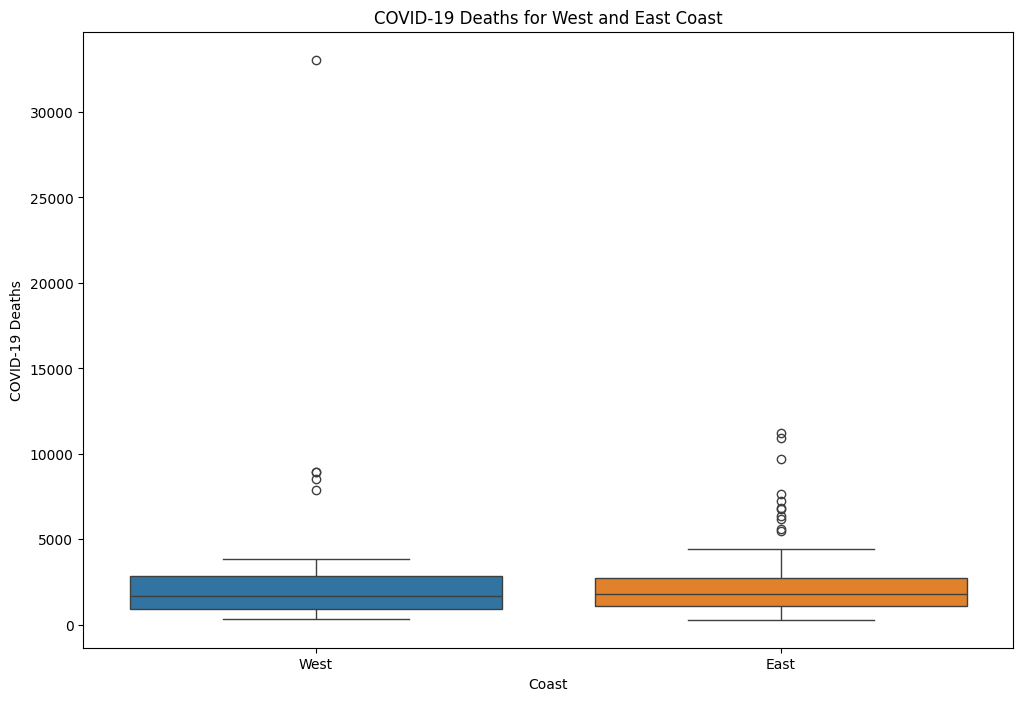

In [13]:
plt.figure(figsize = (12, 8))

boxplot = sns.boxplot(data = df, y = 'COVID-19 Deaths', x = 'Coast', hue = 'Coast')
boxplot.set_xlabel('Coast')
boxplot.set_title('COVID-19 Deaths for West and East Coast')

Looking at this graph, we can see the general distributions of COVID-19 Deaths between the West and East Coast. We can see that the East Coast has more outliers than the West Coast. We can also see that the interquartile range between the West and East Coast are fairly similar. However, based on this information alone, it is hard to visualize the actual difference or meaningful trends between these two populations. Perhaps there is a better way to quantify this.

### COVID Death Rates in Relation to Coast T-test



In [14]:
west_df = df[df['Coast'] == 'West']
east_df = df[df['Coast'] == 'East']

t_statistic, p_value = ttest_ind(west_df['Portion of Deaths due to COVID'], east_df['Portion of Deaths due to COVID'])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -3.801220815269658
p-value: 0.00020113242613057811


In order to quantify that living in the West vs East Coast actually causes a significant difference in the portion of deaths due to COVID, let's use a t-test to test the difference between these two groups. This works well with the given data because we would like to see if there really is a statistical difference between East and West Coast COVID Rates and the null hypothesis of the trend being caused by random chance. Since our p_value is very small, below the threshold of 0.01, this means that there is a statistical difference between COVID death rates on the East Coast vs the West Coast and that the difference is not due to random chance. Now, let's take a look at our four different types of urbanization areas, which are Small Metro, Medium Metro, Large Fringe Metro and Large Central Metro and how they affect COVID total deaths and COVID death rates.


## Urbanization level Analysis

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## ETC AD NASEUM

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.